# Analysis

The analysis is divided into four parts:
1. Data understanding 
2. Data cleaning 
3. Data Analysis 
4. Recommendations


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import the warnings.
import warnings 
warnings.filterwarnings("ignore")

#read or load the datset
loan = pd.read_csv(r"C:\Users\moury\UPGRAD\EDA\loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Understanding

In [2]:
# let's look at the first five rows of the dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#we will look at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
#we will look at the shape of the dataset
loan.shape

(39717, 111)

In [5]:

loan.size

4408587

Several key columns in the dataset include loan_amount, term, interest rate, grade, sub-grade, annual income, purpose of the loan, etc. The focal point for comparison across independent variables is the target variable - loan status. The approach involves examining the average default rates associated with different independent variables to pinpoint those that have the most significant impact on the default rate.









# Data Cleaning

Certain columns exhibit a substantial number of missing values. Initially, the priority is to address these missing values, after which we will investigate and rectify other types of data quality issues.

In [6]:
# Providing a summary of the count of missing values within each column.
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Offering a summary of the proportion of missing values within each column, expressed as a percentage.
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Observing that several columns exhibit complete absence of values (100% missing), while others show varying percentages such as 65%, 33%, etc. To begin with, let's eliminate the columns with a full complement of missing values.








In [8]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)



(39717, 55)


In [10]:
# once moresummarise number of missing values 
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [11]:
#Currently, two columns, namely "description" and "months since last delinquent," display approximately 32% and 64% missing values, respectively.
#Let's examine a subset of entries within these columns

loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The "description" column contains comments written by the loan applicant during the application process. Although it's possible to leverage text analysis techniques to extract new features (such as sentiment, counts of positive/negative words, etc.) from this column, it won't be utilized in the current analysis.

Additionally, the "months since last delinquent" column represents the number of months that have passed since the individual last fell into the 90-day past due (DPD) group. It's crucial to exclude this column from the analysis because, at the time of loan application, this data is not available (it is generated months after loan approval). As such, it cannot serve as a predictor of default at the time of loan approval.

Therefore, let's proceed with dropping these two columns.

In [12]:
# drop two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [13]:
# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are additional columns with missing values, but for the current purpose (as we are not conducting any modeling), these can be disregarded, and imputation of all missing values may not be necessary. However, it is essential to assess whether certain rows exhibit a considerable number of missing values.

In [14]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [15]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

The overall impression is that the data is relatively clean. Additionally, it's important to verify whether all columns are in the correct format.

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
#The "int_rate" column is currently of character type; let's convert it to a float format.
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [18]:
# checking the data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [19]:
# Additionally, let's extract the numeric part from the "employment length" variable.

# Firstly, let's eliminate the missing values from the column; this is crucial to prevent any errors when applying the subsequent regex code.
loan = loan[~loan['emp_length'].isnull()]

# Employing regular expressions to extract numeric values from the string.
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert this to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [20]:
# Examining the data types of the columns once more.
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

## Data Analysis

Transitioning to data analysis, the initial step involves clarifying the analysis objective and identifying the variables under consideration. The primary goal is to pinpoint predictors of default, enabling the utilization of these variables for loan approval/rejection at the time of application. Broadly, there are three categories of variables:

1. **Applicant-related Variables:**
   - Demographic information such as age, occupation, employment details, etc.

2. **Loan Characteristics:**
   - Attributes related to the loan itself, including the loan amount, interest rate, purpose of the loan, etc.

3. **Customer Behavior Variables:**
   - Variables generated after loan approval, such as delinquency over the past 2 years, revolving balance, next payment date, etc.

Given that customer behavior variables are not accessible at the time of loan application, they cannot serve as predictors for credit approval. Consequently, moving forward, the analysis will focus solely on the first two types of variables.

In [21]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [22]:
# Let's proceed to exclude the behavior variables from the analysis.
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

Usually, variables like `acc_now_delinquent`, `chargeoff_within_12_months`, etc., which pertain to the applicant's past loans, are accessible from the credit bureau.

In [23]:
# Additionally, we won't be able to leverage variables such as zip code, address, state, etc. Furthermore, the 'title' variable is derived from the 'purpose' variable. Hence, let's eliminate all these variables from the analysis.

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

Next, let's examine the target variable - `loan_status`. It's essential to relabel the values into a binary form, where 1 indicates that the person has defaulted and 0 indicates otherwise.



In [24]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [25]:
#Observing that a significant portion of the loans falls under the "fully paid" category. The ones labeled as 'current' are neither fully paid nor defaulted, so let's exclude the current loans. Additionally, we'll assign binary labels 0 or 1 to the remaining two values for analysis.

# filtering
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to int datatype
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## Univariate Analysis
Univariate analysis involves the examination of a single variable in isolation to understand its distribution, characteristics, and patterns



In [26]:
# default rate
round(np.mean(df['loan_status']), 2)

0.14

The overall default rate is about 14%.  

now let's first visualise the average default rates across categorical variables.


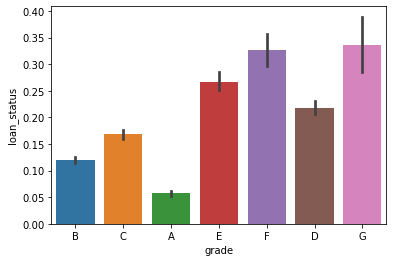

In [27]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [28]:
#define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()
    

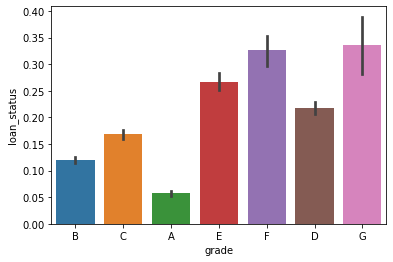

In [29]:
# comparing the default rates across grade of loan
plot_cat('grade')

Clearly, there is a noticeable rise in the default rate as the loan grade transitions from A to G. This aligns with expectations, as this determines the grade based on the assessed risk level of the loan. The ascending order of grades corresponds to an increase in perceived riskiness.

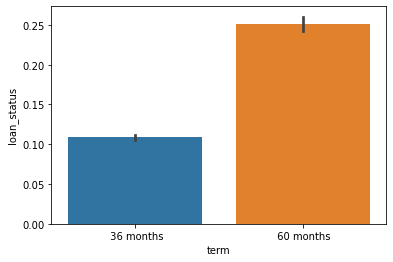

In [30]:
# term: 60 months loans default more than 36 months loans
plot_cat('term')

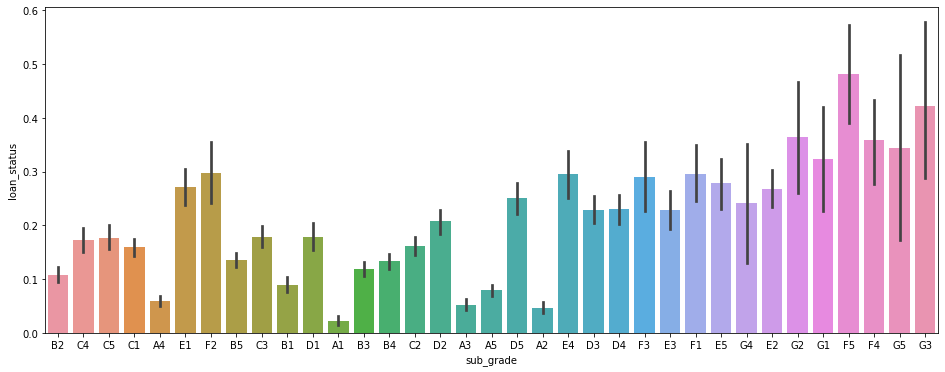

In [31]:
# the sub-grade follows an expected pattern where A1 is superior to A2, which in turn is better than A3, and so forth. This hierarchical structure is in line with the grading system, indicating a finer classification within each grade. 
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

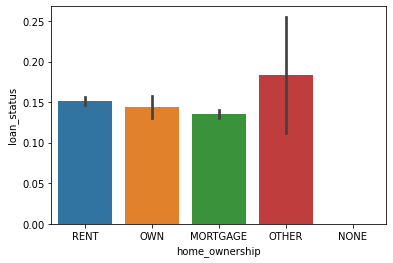

In [32]:
# The variable "home ownership" does not appear to be a significant discriminator.
plot_cat('home_ownership')

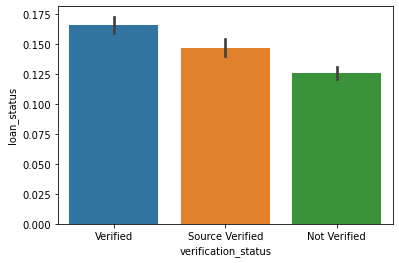

In [33]:
#Surprisingly, there is an unexpected trend where verified loans exhibit a higher default rate compared to non-verified loans in the "verification_status" category.
plot_cat('verification_status')

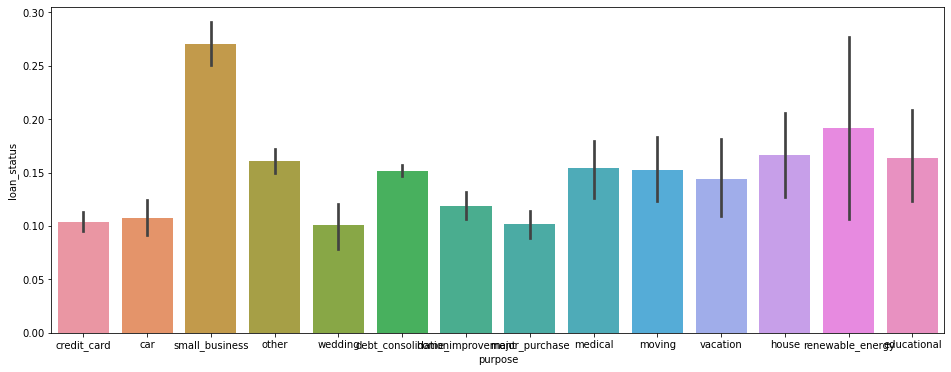

In [34]:
#In terms of loan purposes, there is a notable pattern where small business loans exhibit the highest default rate, followed by renewable energy and education loans.
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In [35]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [36]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [37]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)




In [38]:
# now observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

The data illustrates a consistent increase in the number of loans over the years.

In [39]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

The majority of loans are approved in December, with a general trend of higher loan approval rates in the latter half of the year.

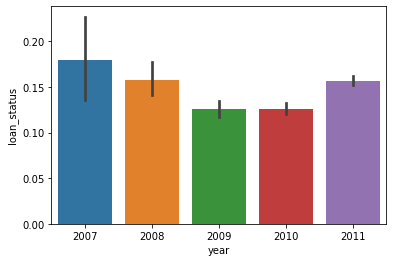

In [40]:
# Let's compare the default rates across different years. now that the default rate experienced a sudden increase in 2011 despite a decreasing trend from 2008 to 2010.
plot_cat('year')

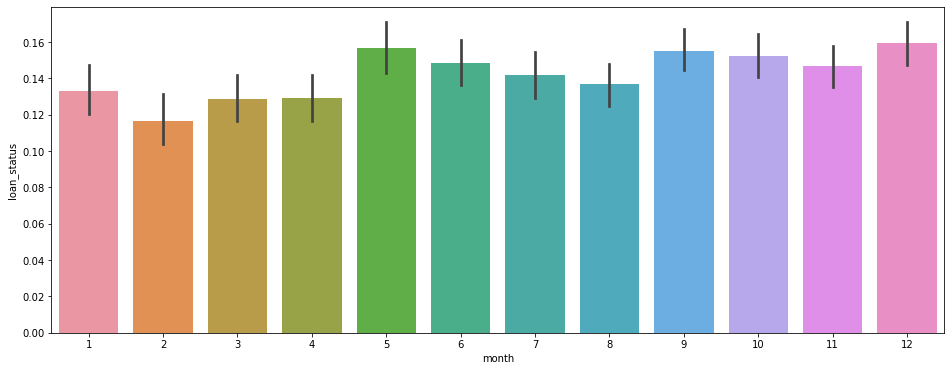

In [41]:
# When comparing default rates across months, there doesn't seem to be significant variation the rates remain relatively consistent across different months.
plt.figure(figsize=(16, 6))
plot_cat('month')

now let's proceed to analyze how the default rate varies across continuous variables.

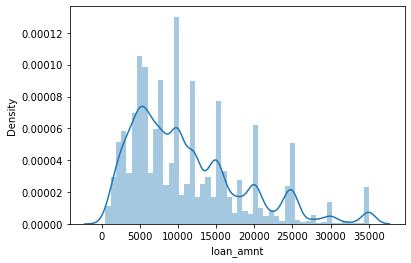

In [42]:
# the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

Certainly, let's categorize the loan amount variable into discrete bins such as small, medium, high, and very high to facilitate the analysis of how default rates vary across different loan amounts.

In [43]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))


In [44]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

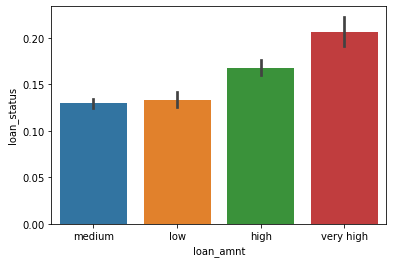

In [45]:
# Upon comparing default rates across different loan amount categories, a discernible trend emerges: the default rate tends to increase with higher loan amounts.
plot_cat('loan_amnt')

In [46]:
# now let's convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

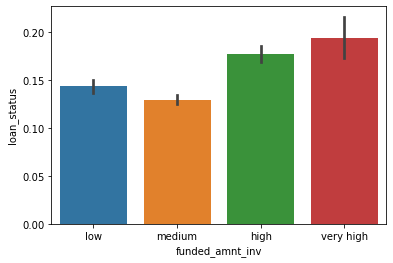

In [47]:
# funded amount invested
plot_cat('funded_amnt_inv')

In [48]:
# now let's also convert interest rate to low, medium and high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

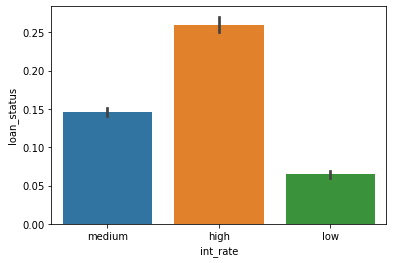

In [49]:
# In the comparison of default rates across different interest rates, a clear pattern emerges: loans with higher interest rates exhibit higher default rates, aligning with expectations.
plot_cat('int_rate')

In [50]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

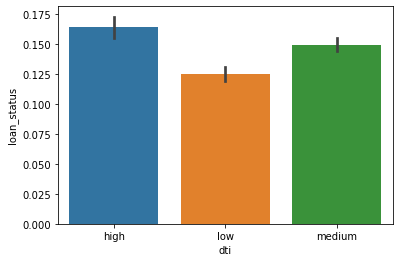

In [51]:
# When assessing default rates across debt-to-income ratios there is a noticeable correlation: higher the  debt-to-income ratios are associated with higher default rates, consistent with expectations.
plot_cat('dti')

In [52]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

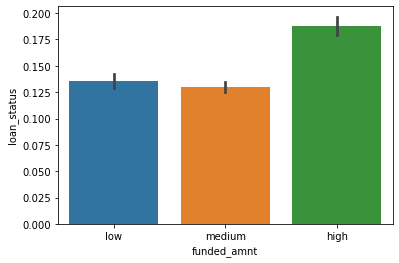

In [53]:
plot_cat('funded_amnt')

In [54]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

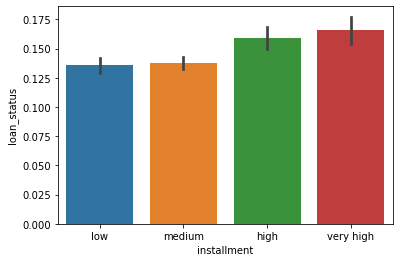

In [55]:
# In the analysis of default rates across installment amounts, a distinct pattern emerges: loans with higher installment amounts correspond to higher default rates.
plot_cat('installment')

In [56]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

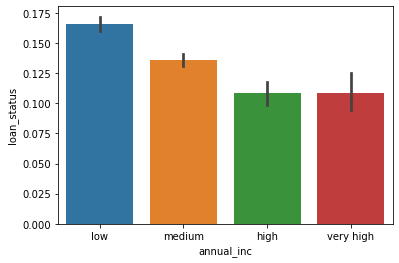

In [57]:
# Examining the relationship between annual income and default rates reveals a clear trend: lower annual incomes are associated with higher default rates.
plot_cat('annual_inc')

In [58]:
# employment length
# let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

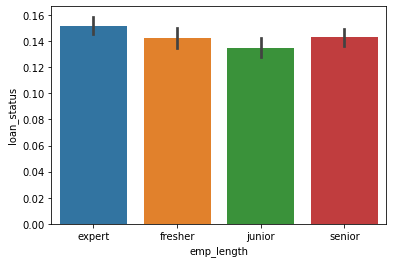

In [59]:
# The analysis of employment length in relation to default rates suggests that it is not a significant predictor of default.
plot_cat('emp_length')

## Segmented Univariate Analysis

After comparing default rates across various variables, we've identified some key predictors such as the purpose of the loan, interest rate, annual income, grade, etc.

In the credit industry, the purpose of the loan is often a critical factor influencing default rates. Different loan purposes, such as home loans, credit cards, and debt consolidation loans, can exhibit distinct patterns.

Let's revisit the default rates across the purpose of the loan to further explore these business insights.


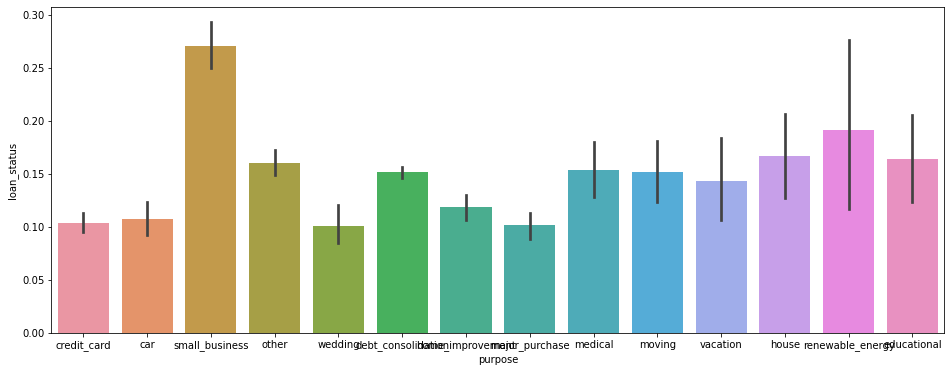

In [60]:
#  Small business loans have the highest default rate, followed by renewable energy and education loans
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In the upcoming analyses, we'll segment the loan applications based on the purpose of the loan. This approach is essential as the purpose of the loan significantly influences other variables, including the type of applicant, interest rate, income, and ultimately, the default rate.

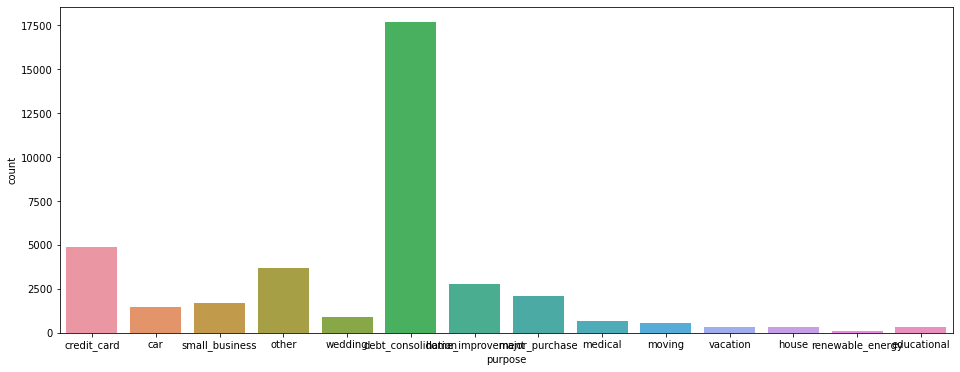

In [61]:
#  now let's begin by examining the distribution of loans across different types (purposes) of loans. Notably, the majority of loans fall under the category of debt consolidation (repaying other debts), followed by credit card loans, and major purchases, among others.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

now let's proceed with the analysis of the top four types of loans based on purpose: consolidation, credit card, home improvement, and major purchase.

In [62]:
# filtering the df for the 4 types of loans 
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

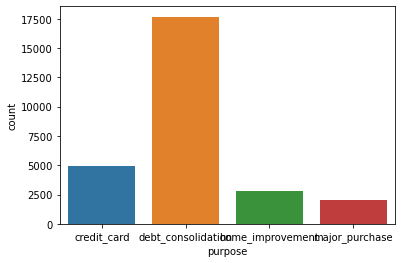

In [63]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

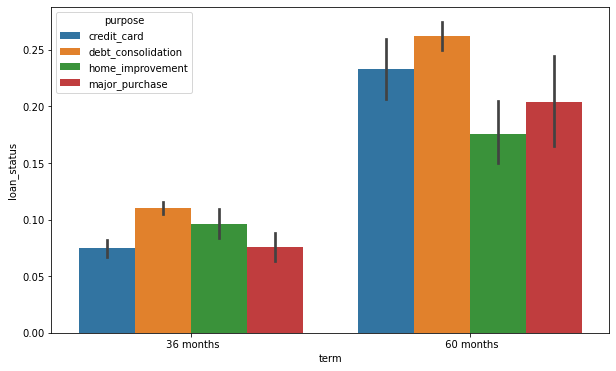

In [64]:
# now  let's compare default rates across two types of categorical variables: the constant variable, purpose of the loan, and another variable that varies. This will help us understand how default rates change based on the interaction between the loan purpose and another categorical variable.
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()


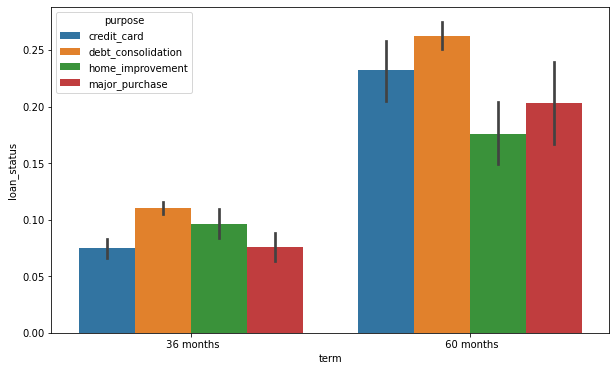

In [65]:
# now let's create a function that accepts a categorical variable and generates a plot illustrating the default rate, segmented by the purpose of the loan.
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

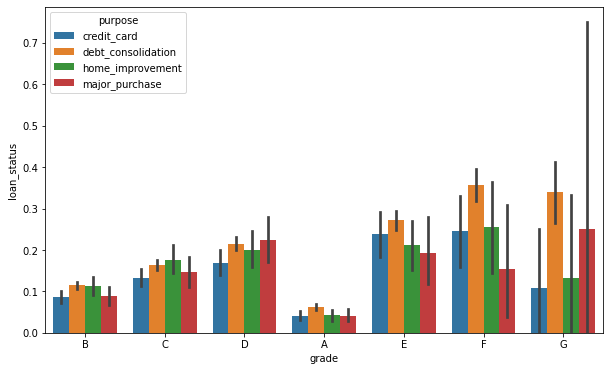

In [66]:
# grade of loan
plot_segmented('grade')

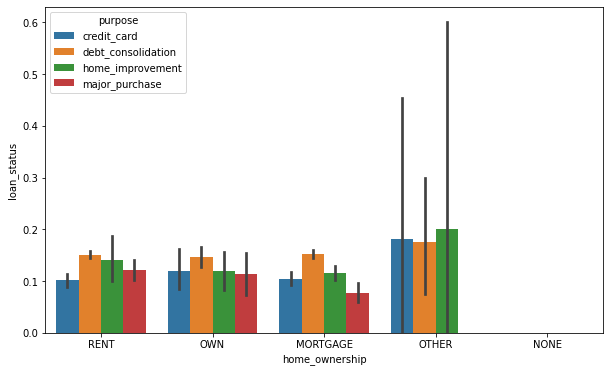

In [67]:
# home ownership
plot_segmented('home_ownership')

Generally, debt consolidation loans tend to have the highest default rates. Let's extend this comparison to other categories as well.

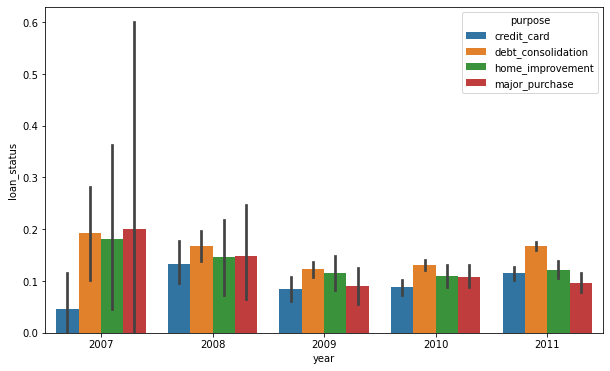

In [68]:
# year
plot_segmented('year')

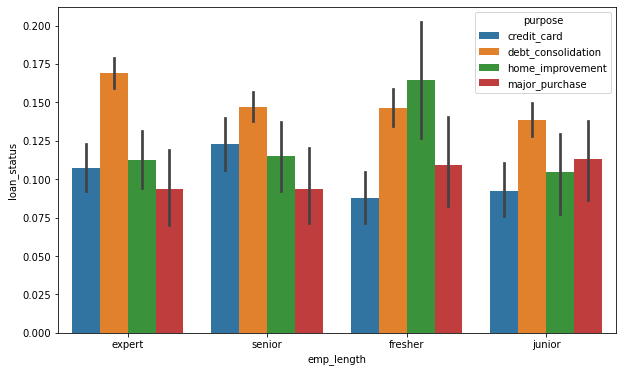

In [69]:
# emp_length
plot_segmented('emp_length')

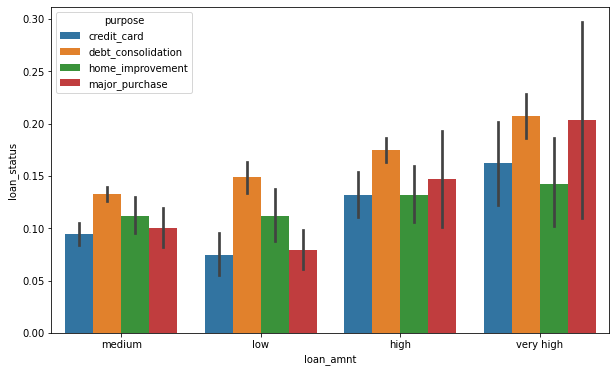

In [70]:
# loan_amnt
plot_segmented('loan_amnt')

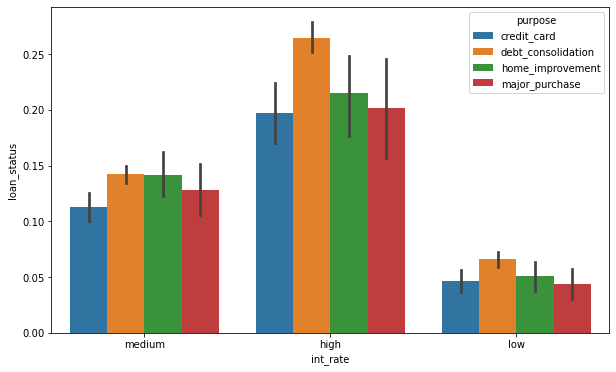

In [71]:
# interest rate
plot_segmented('int_rate')

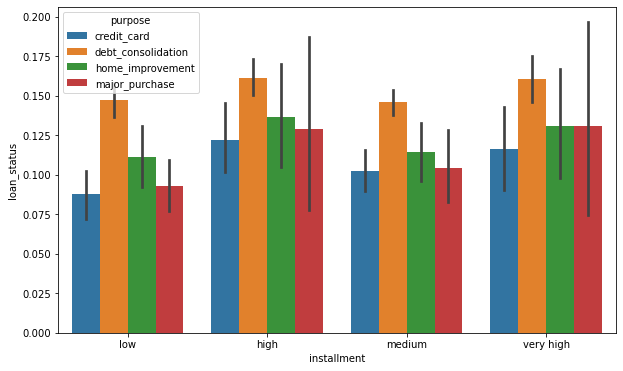

In [72]:
# installment
plot_segmented('installment')

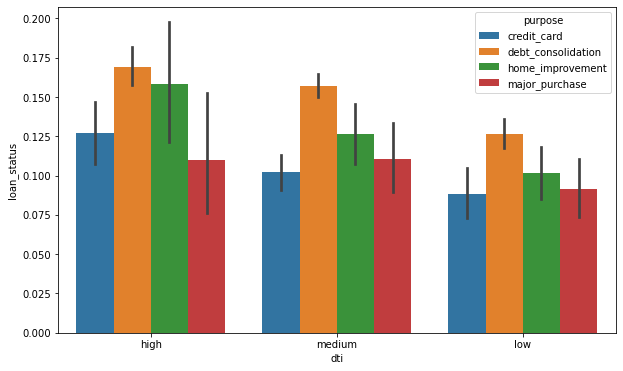

In [73]:
# debt to income ratio
plot_segmented('dti')

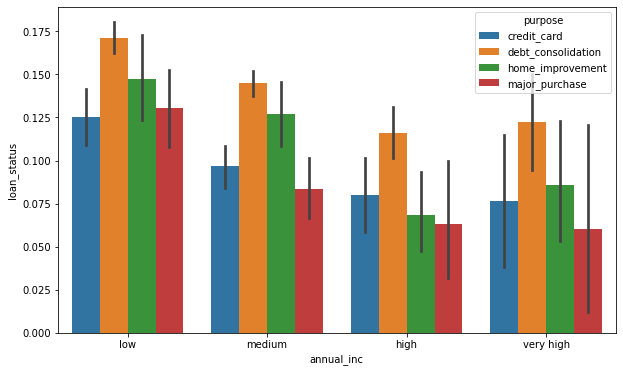

In [74]:
# annual income
plot_segmented('annual_inc')

A meaningful approach to quantify the impact of a categorical variable on the default rate is to assess 'how much the default rate varies across the categories'. 
now let's illustrate this with an example using annual_inc as the categorical variable.

In [75]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [76]:
# now a function can be designed to take a categorical variable as input and calculate the average default rate across its categories. Additionally, it can compute the 'difference between the highest and lowest default rate' across these categories, providing a useful metric to gauge the variable's impact on default rates.

def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)


annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Therefore, there is a 6% increase in the default rate as you transition from high to low annual income. This difference can be computed for all variables, helping to identify those that have a more pronounced impact on the default rate.

In [77]:
# now we will filter all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

# Now for each variable we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


In [78]:
# now we will store the diff of default rates for each column in a dictonary
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}
